# Diabetes Prediction

The objective of this project is to create a diabetes diagnostic prediction model based on particular health metrics. The National Institute of Diabetes and Digestive and Kidney Diseases provided the dataset utilized in this investigation, which is intended to identify patients with or without diabetes. It is significant to emphasize that the dataset was selected using strict criteria: all patients included had to be female, Pima Indian, and at least 21 years old.

Using these medical variables to create a machine learning model that can precisely determine whether a patient has diabetes is the main goal of this study. A model like this can have a big impact on clinical practice by helping medical practitioners identify and treat patients at an early stage.

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
##for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
 # For standardizing numerical features
from sklearn.preprocessing import StandardScaler 



In [3]:
## read out the dataset
df = pd.read_csv('diabetes.csv')

## Data Exploration

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Here's a brief explanation of each column:

<b>Pregnancies</b>  :  Number of times pregnant.

<b>Glucose</b>  : Plasma glucose concentration after 2 hours in an oral glucose tolerance test.

<b>BloodPressure</b> : Diastolic blood pressure (mm Hg).

<b>SkinThickness</b> : Triceps skinfold thickness (mm).

<b>Insulin</b> : 2-Hour serum insulin (mu U/ml).

<b>BMI</b> : Body mass index (weight in kg/(height in m)^2).

<b>DiabetesPedigreeFunction</b>  : Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).

<b>Age</b>  : Age in years.

<b>Outcome</b>  : Class variable (0 or 1) indicating whether the person has diabetes or not.


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* The minimum blood pressure,SkinThickness,BMI and Insulin is 0 that is not biologically possible, so we can say that like 0 might be a placeholder for missing values.

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.shape

(768, 9)

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Data Processing

In [10]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI',  'Age']
df[columns] = df[columns].replace(0, np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
for column in columns : 
    df[column].fillna(df[column].median(),inplace = True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Data Visualisation

#### Visualizing Correlations with a Heatmap

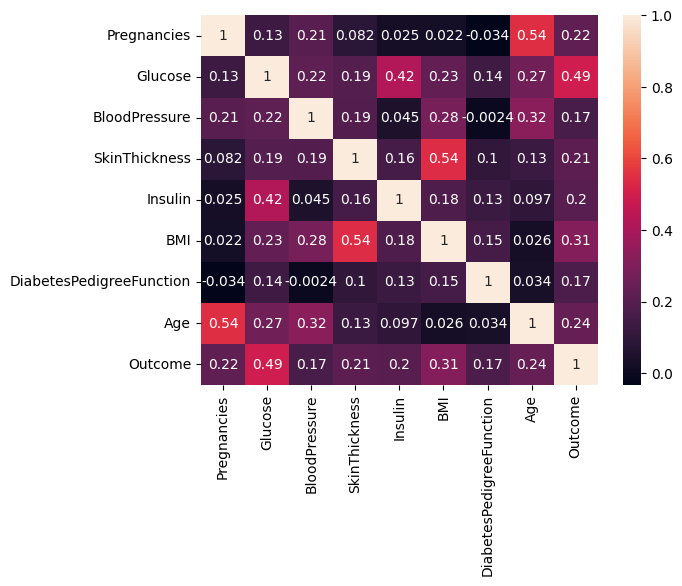

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Visualizing the Distribution of Features using Histograms 

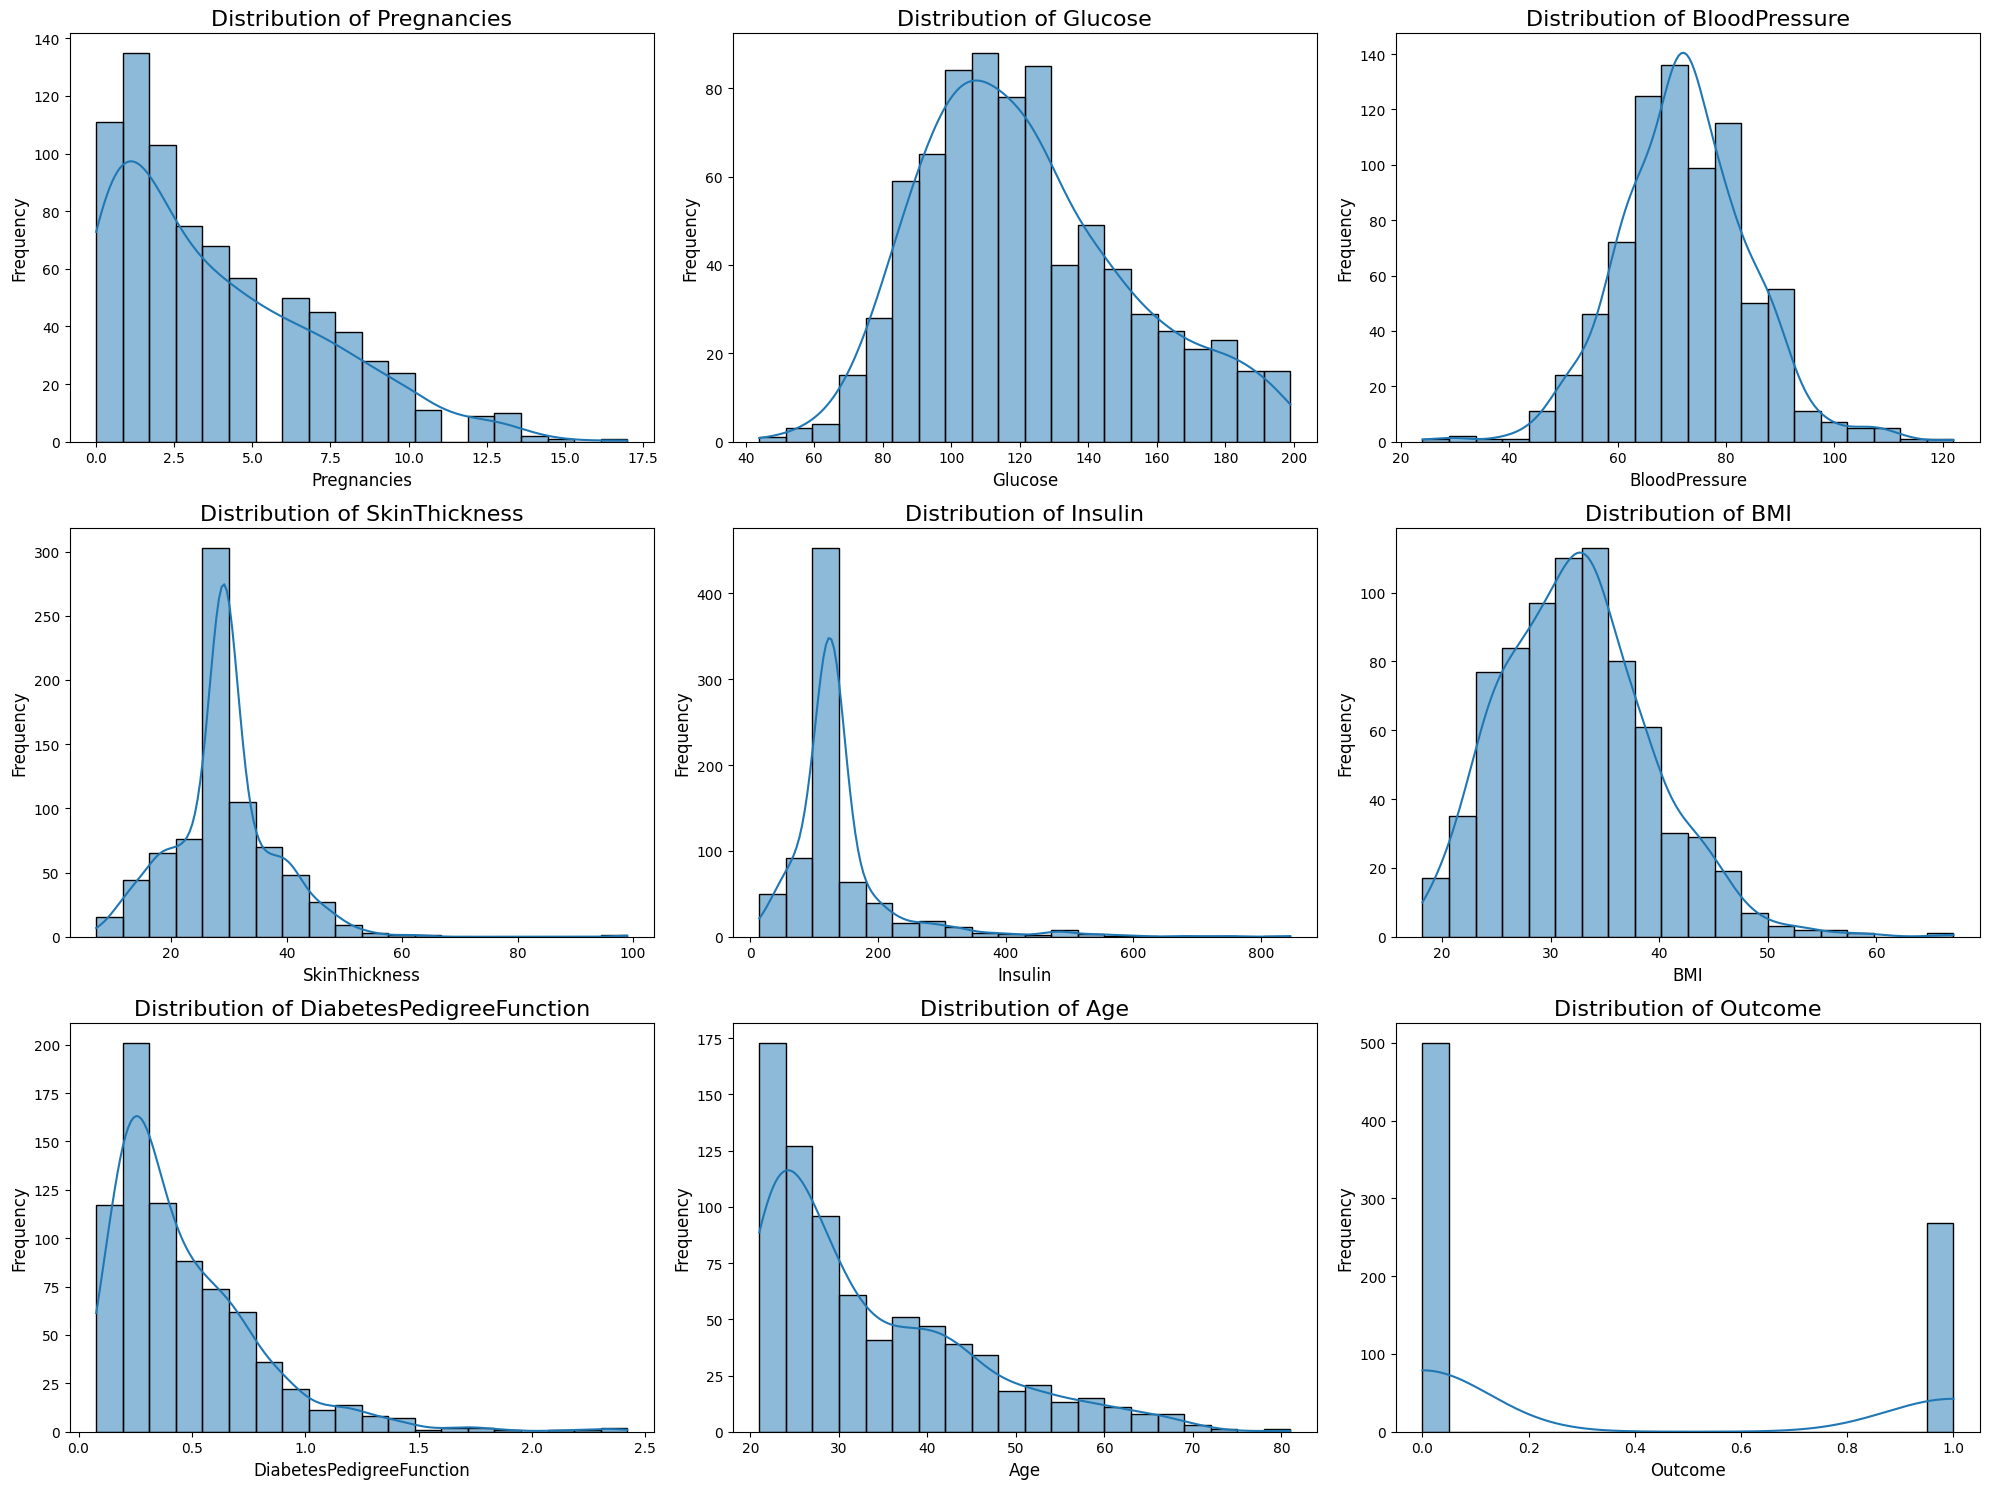

In [14]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Insights, that we got from histogram,

* **Pregnancies:** Most of the women in the dataset have had either no pregnancies or only 1 or 2 pregnancies. There are fewer women who have had more pregnancies.

* **Glucose:** The levels of glucose (sugar in the blood) follow a somewhat normal pattern, but there is a small group of people with lower glucose levels.

* **Blood Pressure:** Blood pressure values tend to center around 70. It's like the average or typical blood pressure in the dataset.

* **Skin Thickness:** Many people in the dataset have lower skin thickness values, and there's a peak around those values. It means that a significant number of individuals have relatively thinner skin.

* **Insulin:** Most people have lower insulin levels, but there are a few individuals with higher insulin values.

* **BMI (Body Mass Index):** BMI values are slightly skewed to the right, with a peak around 30. This suggests that many people have a BMI around 30, which is considered overweight.

* **Diabetes Pedigree Function:** The majority of individuals in the dataset have a low value for this function, indicating that, based on their family history, they have a lower likelihood of developing diabetes.

* **Age:** Most people in the dataset are in their 20s and 40s, with relatively fewer individuals in other age groups.

* **Outcome**: More people in the dataset do not have diabetes (labeled as 0) compared to those who do have diabetes (labeled as 1).

#### Visualizing the Distribution of Features using Box Plot 

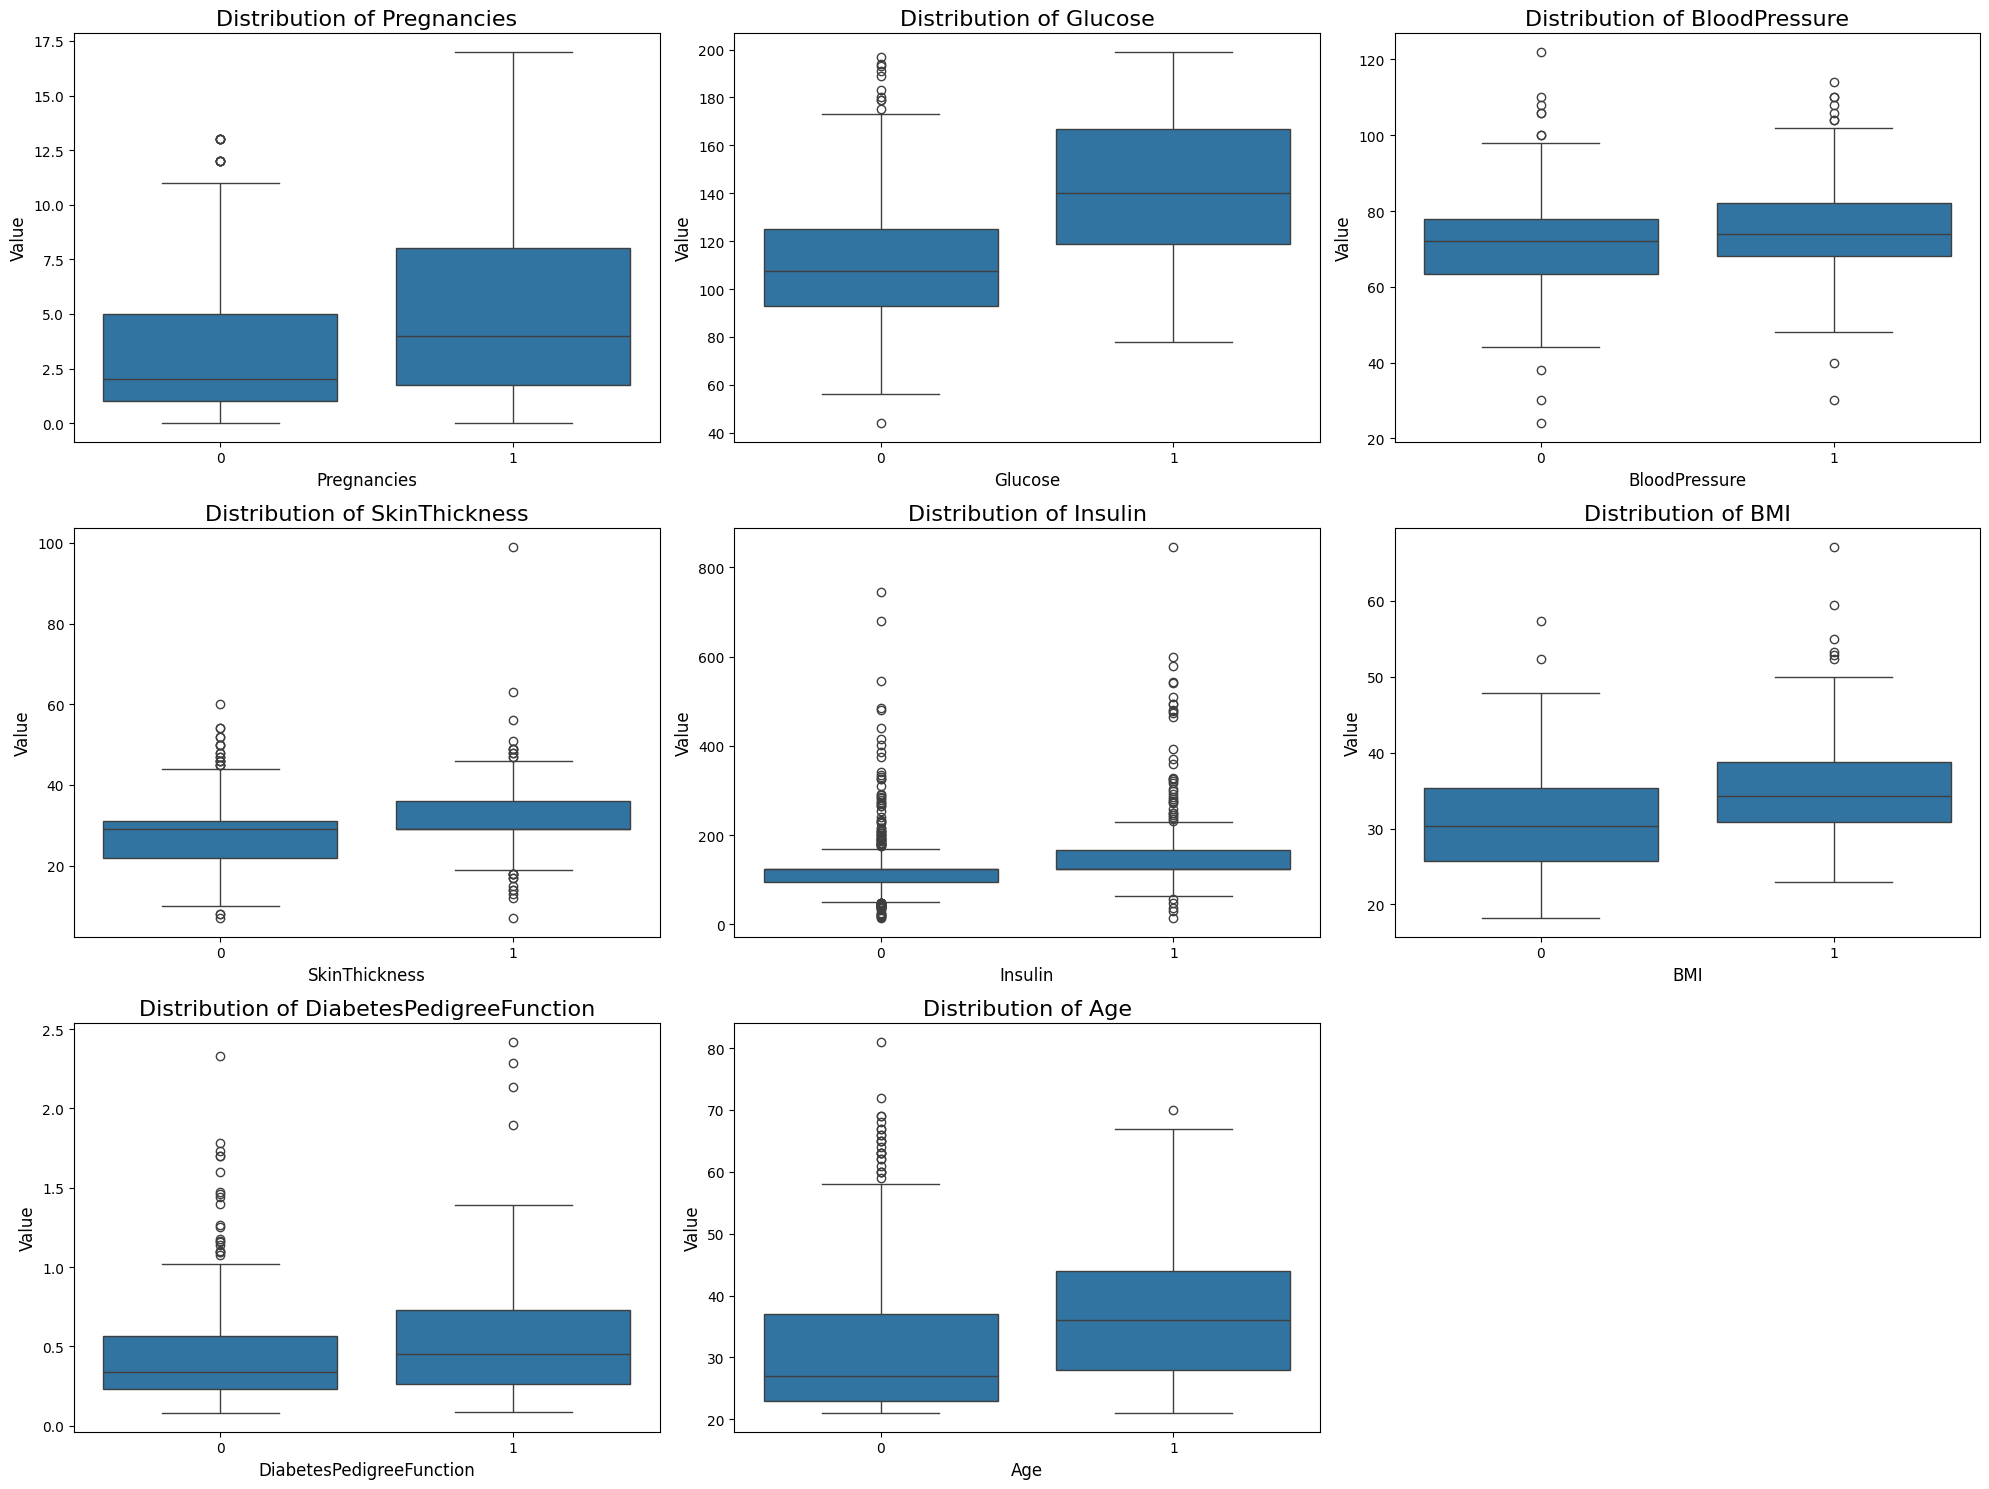

In [15]:
df_No_Outcome = df.iloc[:,:-1]

num_cols = len(df_No_Outcome.columns)
num_rows = (num_cols - 1) // 3 + 1  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))

axes = axes.flatten()
for i, column in enumerate(df_No_Outcome.columns):
    sns.boxplot(data=df,y=df[column],x = df['Outcome'] ,  ax=axes[i])
  
    axes[i].set_title(f'Distribution of {column}', fontsize=16)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)

# Remove any empty subplots
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


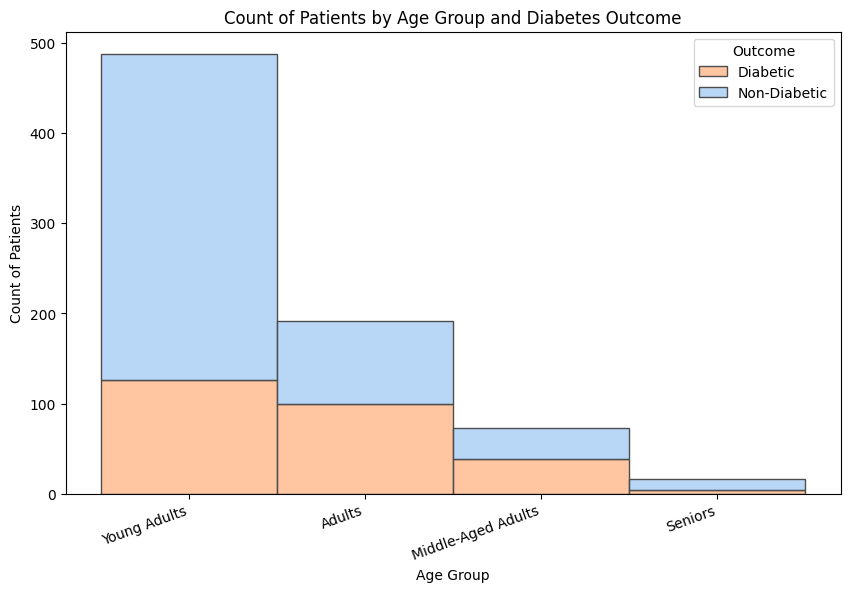

In [16]:

bins = [20, 35, 50, 65, 200]
labels = ['Young Adults', 'Adults', 'Middle-Aged Adults', 'Seniors']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AgeGroup', hue='Outcome', multiple='stack', palette='pastel', edgecolor=".3")
plt.xlabel('Age Group')
plt.ylabel('Count of Patients')
plt.title('Count of Patients by Age Group and Diabetes Outcome')
plt.xticks(rotation=20, ha='right') 
plt.legend(title='Outcome', labels=[ 'Diabetic', 'Non-Diabetic'])
plt.show()


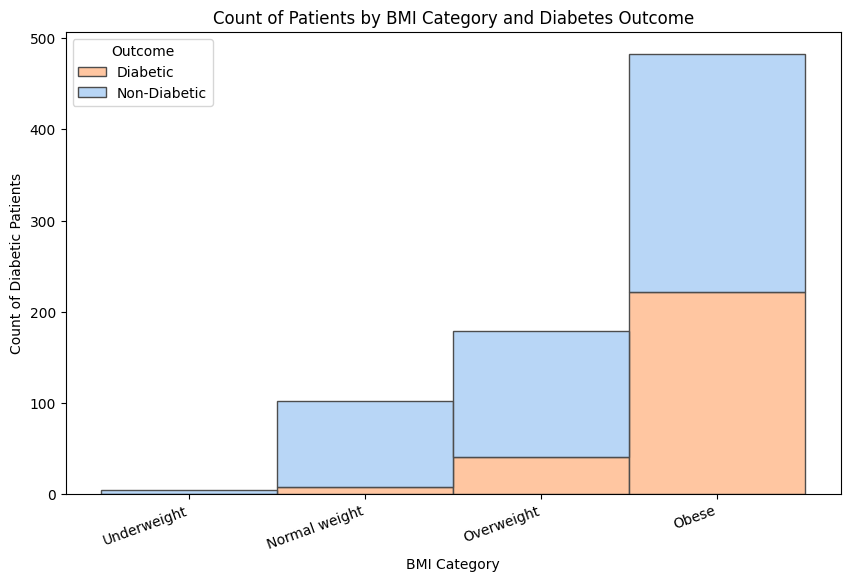

In [17]:
bmi_bins = [0, 18.5, 24.9, 29.9, 1000]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

df['BMICategory'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMICategory', hue='Outcome', multiple='stack', palette='pastel', edgecolor=".3")
plt.xlabel('BMI Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Patients by BMI Category and Diabetes Outcome')
plt.xticks(rotation=20, ha='right') 
plt.legend(title='Outcome', labels=[ 'Diabetic', 'Non-Diabetic'])
plt.show()

In [18]:
blood_pressure_bins = [0, 80, 89, 99, 119, 1000] 
blood_pressure_labels = ['Low', 'Normal', 'Prehypertension', 'Stage 1 hypertension', 'Stage 2 hypertension']
df['BloodPressureCategory'] = pd.cut(df['BloodPressure'], bins=blood_pressure_bins, labels=blood_pressure_labels,right=False)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMICategory,BloodPressureCategory
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Middle-Aged Adults,Obese,Low
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Young Adults,Overweight,Low
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Young Adults,Normal weight,Low
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Young Adults,Overweight,Low
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Young Adults,Obese,Low


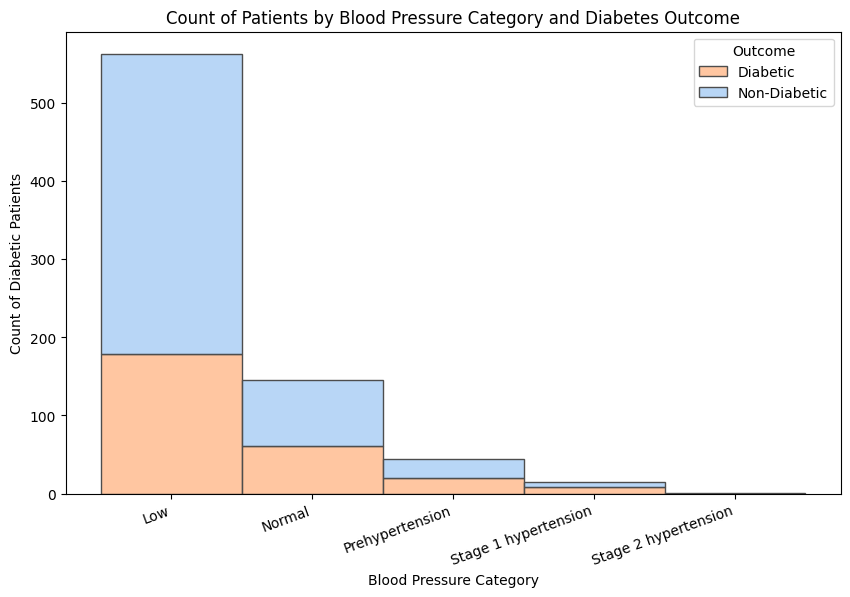

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BloodPressureCategory', hue='Outcome', multiple='stack', palette='pastel', edgecolor=".3")
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count of Diabetic Patients')
plt.title('Count of Patients by Blood Pressure Category and Diabetes Outcome')
plt.xticks(rotation=20, ha='right')
plt.legend(title='Outcome', labels=[ 'Diabetic', 'Non-Diabetic'])
plt.show()

In [20]:
outcome_counts = df['Outcome'].value_counts()
outcome_counts

Outcome
0    500
1    268
Name: count, dtype: int64

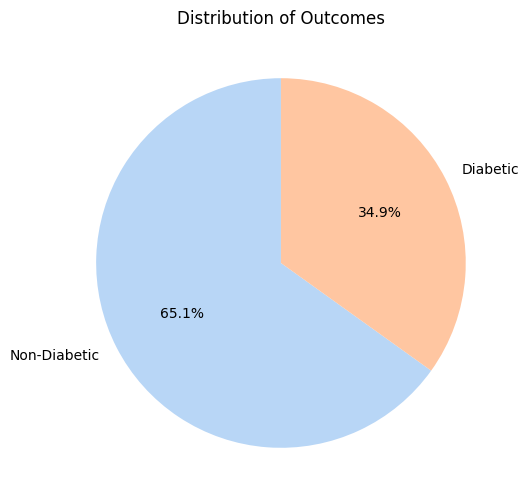

In [21]:
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'],
autopct='%1.1f%%', startangle=90, colors=['#B8D6F6','#FFC6A1'])
plt.title('Distribution of Outcomes')
plt.show()

## Data Wrangling 

In [22]:
#Independent Variables
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
#Target Variable
y = df['Outcome']


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape  )

(614, 8)


## Feature Scaling

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train


array([[-0.85811767,  0.04869548,  0.12833387, ..., -0.66090407,
        -1.10316947, -0.27704152],
       [-0.85811767, -0.89788944,  0.7953984 , ...,  0.40034496,
        -0.71238555,  0.84376203],
       [-1.15412006, -0.9305303 , -0.20519839, ...,  1.65320841,
        -0.37742791, -1.05298243],
       ...,
       [ 0.02988949,  0.08133634, -0.20519839, ..., -0.4987688 ,
         1.96433735,  1.01619334],
       [-0.2661129 , -0.21243139,  0.12833387, ..., -0.88199762,
        -1.08260189, -0.79433546],
       [ 0.02988949, -0.40827655, -0.53873066, ..., -0.0565817 ,
        -0.01308802, -0.36325717]])

## Model Training and Evaluation

In [25]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [26]:

#Prediction on Traing Data
log_pred_train = logistic.predict(X_train)
#Prediction on Test Data
log_pred_test = logistic.predict(X_test)


In [27]:
log_Train_Accuracy = m.accuracy_score(y_train,log_pred_train)*100
log_Test_Accuracy = m.accuracy_score(y_test,log_pred_test)*100

print(f"Train Accuracy: {log_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {log_Test_Accuracy:.2f}%")


Train Accuracy: 77.52%
Test Accuracy: 76.62%


In [28]:
print('Classification_Report')
print(m.classification_report(y_test,log_pred_test))
print('Confusion_Matrix')
print(m.confusion_matrix(y_test,log_pred_test))

Classification_Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.62      0.51      0.56        45

    accuracy                           0.77       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.76      0.77      0.76       154

Confusion_Matrix
[[95 14]
 [22 23]]


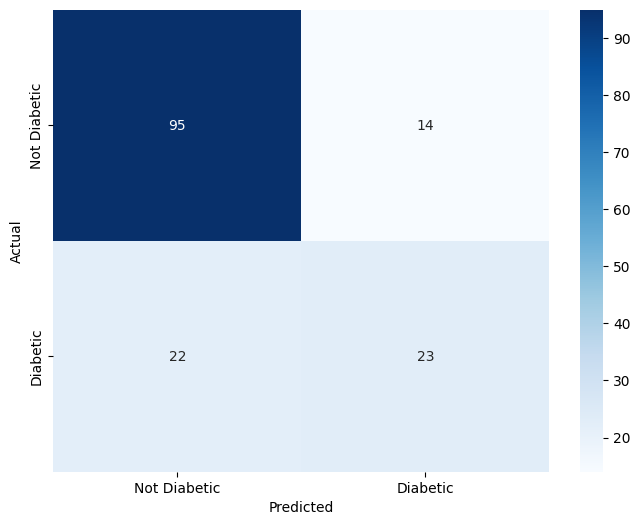

In [29]:
plt.figure(figsize=(8, 6))
cm = m.confusion_matrix(y_test, log_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=["Not Diabetic", "Diabetic"], yticklabels=["Not Diabetic", "Diabetic"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
     

## Diabetes Prediction

In [30]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logistic.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [32]:
df.to_csv('final_diabetes.csv', index=False)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMICategory,BloodPressureCategory
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Middle-Aged Adults,Obese,Low
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Young Adults,Overweight,Low
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Young Adults,Normal weight,Low
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Young Adults,Overweight,Low
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Young Adults,Obese,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Middle-Aged Adults,Obese,Low
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0,Young Adults,Obese,Low
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Young Adults,Overweight,Low
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1,Adults,Obese,Low
